# ISBI 2023: Tutorial on Topological Data Analysis

- Cartagena de Indias, Colombia, April 20, 2023
- 20th IEEE International Symposium on Biomedical Imaging

## [Anass B. El-Yaagoubi](https://cemse.kaust.edu.sa/biostats/people/person/anass-el-yaagoubi-bourakna), Statistics Program, KAUST

The goal of this tutorial is to provide an introduction to Python for topological data analysis. We will be presenting the main TDA Python Libraries, that are [Ripser](https://ripser.scikit-tda.org/en/latest/) and [Persim](https://persim.scikit-tda.org/en/latest/). The tutorial will be organized as follows:

- PH on point cloud data with persistence diagrams (PDs)
- Wasserstein distance computation between PDs
- Persistence landscapes (PLs)
- Time delay (TDE) and sliding window (SWE) embeddings for time series data
- Application to Epileptic seizures data set

---

This is joint work with Professor Moo K. Chung-1, and Professor Hernando Ombao-2.
1. Department of Biostatistics & Medical Informatics, University of Wisconsin-Madison
2. Biostatistics Group, CEMSE, King Abdullah University of Science and Technology

### Part 0 - Python dependencies

In this tutorial we will be using [Scikit-TDA](https://scikit-tda.org/), which is Python project for topological data analysis. Scikit-TDA is a user friendly project that makes TDA seem very easy. we will need to install the [Ripser](https://ripser.scikit-tda.org/en/latest/) and [Persim](https://persim.scikit-tda.org/en/latest/) libraries, which are going to be the backbone of our code. However, Scikit-TDA has multiple other TDA libraries that can be very useful as well.

Content of Scikit-TDA:
- Ripser (Homology package - C++)
- Persim (PD, PL and PI. Distances)
- TaDAsets (n-spheres, torus, swiss rolls)
- Kepler Mapper (Mapper algorithm)
- CechMate (Alpha, Rips and Cech filtrations)

### Part 0.1 -  Installing Ripser
- Instalation:
    - pip install ripser
- Documentation:
    - https://pypi.org/project/ripser/

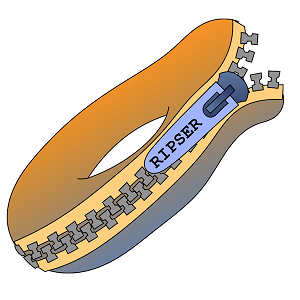

### Part 0.2 -  Installing Persim
- Instalation:
    - pip install persim
- Documentation:
    - https://pypi.org/project/persim/

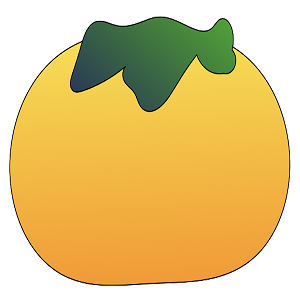

### Part 0.3 -  Installing TaDAsets
- Instalation:
    - pip install tadasets
- Documentation:
    - https://pypi.org/project/tadasets/

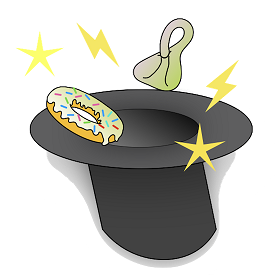

### Part 1 - Introduction with examples

In [4]:
##### Basic but very useful libraries #####
###########################################
import numpy as np                 # For handling arrays
import matplotlib.pyplot as plt    # For visualization

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import warnings
warnings.filterwarnings('ignore')

##### Main TDA libraries #####
##############################
# pip install ripser
from ripser import ripser          # For computing persistence cohomology
# pip install ripser
import persim                      # For handling and visualizing persistence diagrams
from persim import landscapes
# pip install tadasets
from tadasets import sphere, torus # For generating simple but interesting datasets

### Part 1.1 - Sphere example

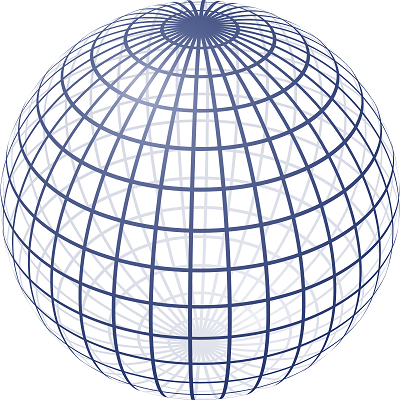

In [5]:
n = 100 # number of points
r = 1   # Sphere radius

# Generates points on a spherical manifold
dataset_sphere = sphere(n=n, r=r)

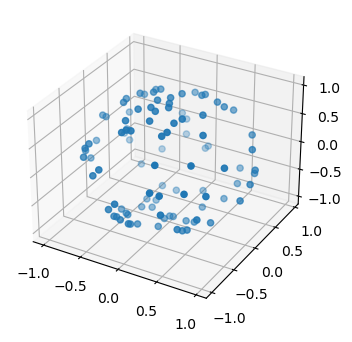

In [6]:
# Creates a x by y inches figure
fg = plt.figure(figsize=(4, 4))
# Creates a 2D projection from 3D data
ax = fg.add_subplot(111, projection='3d')
# Scatter plot of our data
ax.scatter(
    dataset_sphere[:, 0], 
    dataset_sphere[:, 1], 
    dataset_sphere[:, 2])
plt.show()

In [7]:
# To build persistence diagrams:
# X: A cloud of points or a distance matrix
# maxdim: Maximum dimension of topological features to be considered
tda_sphere = ripser(X=dataset_sphere, maxdim=2)
print(tda_sphere.keys())

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])


In [8]:
diagrams_sphere = tda_sphere['dgms']
print("Number of dimensions: ", len(diagrams_sphere))
print()
print("2D-Features: ", diagrams_sphere[2])
print()
print("1D-Features: ", diagrams_sphere[1][:5])

Number of dimensions:  3

2D-Features:  [[1.00153768 1.67159319]
 [0.99517918 1.00179803]]

1D-Features:  [[0.81208891 0.82654965]
 [0.66316426 0.71627194]
 [0.64869165 0.6926592 ]
 [0.59702528 0.75369114]
 [0.58210975 0.69618303]]


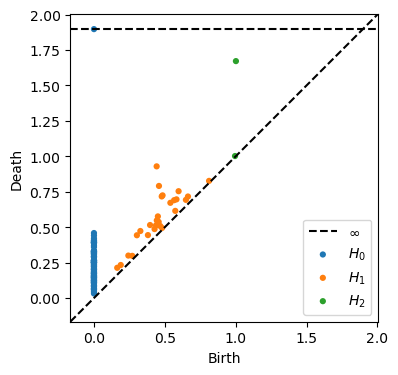

In [9]:
plt.figure(figsize=(4, 4))

# Plots the persistence diagram for all dimensions
persim.plot_diagrams(diagrams_sphere)
plt.show()

### Part 1.2 - Torus example

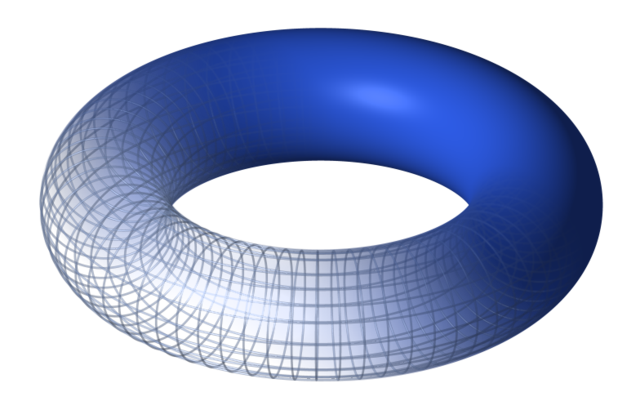

In [10]:
n = 300 # number of points
a = 2   # small radius
c = 5   # big radius

# Generates points on a torus
dataset_torus_clean = torus(n=n, a=a, c=c, noise=0)  # without noise
dataset_torus_noise = torus(n=n, a=a, c=c, noise=.1) # with noise

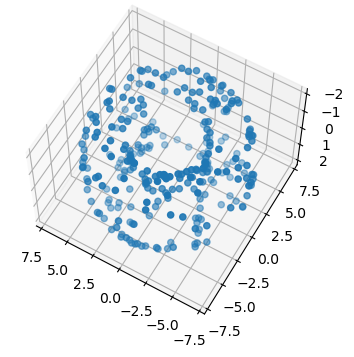

In [11]:
# Creates a x by y inches figure
fg = plt.figure(figsize=(4, 4))
# Creates a 2D projection from 3D data
ax = fg.add_subplot(111, projection='3d')
# Scatter plot of our data
ax.scatter(
    dataset_torus_clean[:, 0], 
    dataset_torus_clean[:, 1], 
    dataset_torus_clean[:, 2])
ax.view_init(-120, 60)
plt.show()

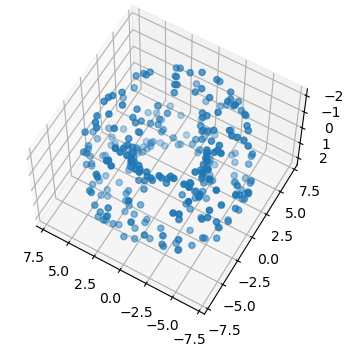

In [12]:
# Creates a x by y inches figure
fg = plt.figure(figsize=(4, 4))
# Creates a 2D projection from 3D data
ax = fg.add_subplot(111, projection='3d')
# Scatter plot of our data
ax.scatter(
    dataset_torus_noise[:, 0], 
    dataset_torus_noise[:, 1], 
    dataset_torus_noise[:, 2])
ax.view_init(-120, 60)
plt.show()

In [13]:
tda_torus_clean = ripser(X=dataset_torus_clean, maxdim=2)
tda_torus_noise = ripser(X=dataset_torus_noise, maxdim=2)

diagrams_torus_clean = tda_torus_clean['dgms']
diagrams_torus_noise = tda_torus_noise['dgms']

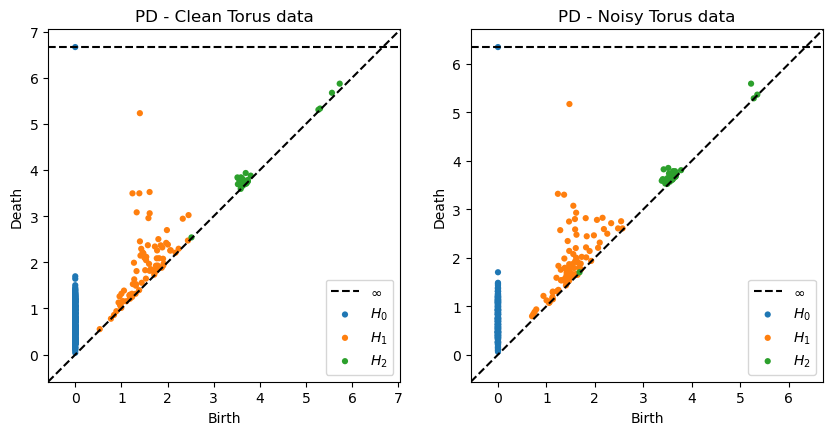

In [52]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('PD - Clean Torus data')
persim.plot_diagrams(diagrams_torus_clean)
plt.subplot(122)
plt.title('PD - Noisy Torus data')
persim.plot_diagrams(diagrams_torus_noise)

plt.show()

### Part 2 - Distance between PDs

Often when we apply TDA to a given data set, it is necessary to compute distances between PDs from different populations. To do so, we usually rely on the notion of Wasserstein distance. In this part of the tutorial, we biefly present how to compute the Wasserstein distance in Python with the help of the Persim library. However, more details regarding the computational aspect of this distance will be given in the next tutorial by Professor Soheil Kolouri.

### Part 2.1 - Wasserstein distance in Python

Let's consider first the Wasserstein distance based on the $L_P$ norm:
<center> $W_p(A, B) = \underset{\gamma:A \twoheadrightarrow B}{\inf} \hspace{5mm} \Bigg( \sum_{x \in A} \big|\big| x-\gamma(x) \big|\big|_2^p \Bigg)^\frac{1}{p}$ </center>

In [17]:
# Computes the Wasserstein distance - clean with clean
WD_dim_1_CC = persim.wasserstein(
    diagrams_torus_clean[1], 
    diagrams_torus_clean[1], 
    matching=False)

# Computes the Wasserstein distance - clean with noisy
WD_dim_1_CN = persim.wasserstein(
    diagrams_torus_clean[1], 
    diagrams_torus_noise[1], 
    matching=False)

print('The 1-Dim diagram Wasserstein distance for C-C is: {:.3f}'.format(WD_dim_1_CC))
print('The 1-Dim diagram Wasserstein distance for C-N is: {:.3f}'.format(WD_dim_1_CN))

The 1-Dim diagram Wasserstein distance for C-C is: 0.000
The 1-Dim diagram Wasserstein distance for C-N is: 9.573


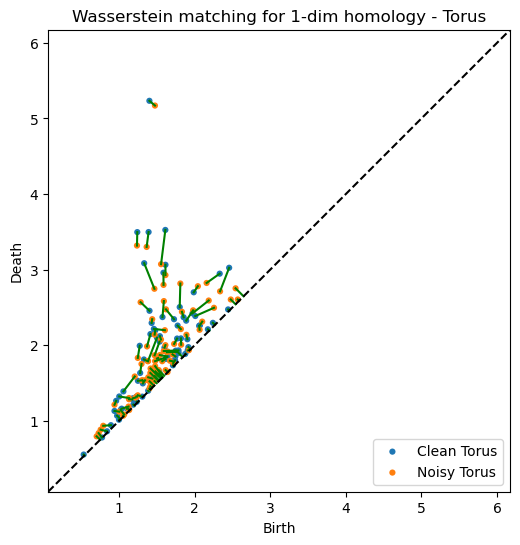

In [53]:
_, matching = persim.wasserstein( # Computes the Wasserstein distance
    diagrams_torus_clean[1],      # Retuns the matching of the points
    diagrams_torus_noise[1], 
    matching=True)

plt.figure(figsize=(6, 6))
persim.wasserstein_matching(
    diagrams_torus_clean[1], 
    diagrams_torus_noise[1], 
    matching=matching, 
    labels=['Clean Torus', 'Noisy Torus'])

plt.title('Wasserstein matching for 1-dim homology - Torus')
plt.show()

### Part 2.1 - Bottelneck distance in Python

Let's consider first the Bottelneck distance based on the $L_\infty$ norm:
<center> $W_\infty(A, B) = \underset{\gamma:A \twoheadrightarrow B}{\inf} \hspace{5mm} \underset{x \in A}{sup} \big|\big| x-\gamma(x) \big|\big|_2$ </center>

In [19]:
# Computes the Bottleneck distance - clean with clean
BD_dim_1_CC = persim.bottleneck(
    diagrams_torus_clean[1], 
    diagrams_torus_clean[1], 
    matching=False)

# Computes the Bottleneck distance - clean with noisy
BD_dim_1_CN = persim.bottleneck(
    diagrams_torus_clean[1], 
    diagrams_torus_noise[1], 
    matching=False)

print('The 1-Dim diagram bottleneck distance for C-C is: {:.3f}'.format(BD_dim_1_CC))
print('The 1-Dim diagram bottleneck distance for C-N is: {:.3f}'.format(BD_dim_1_CN))

The 1-Dim diagram bottleneck distance for C-C is: 0.000
The 1-Dim diagram bottleneck distance for C-N is: 0.424


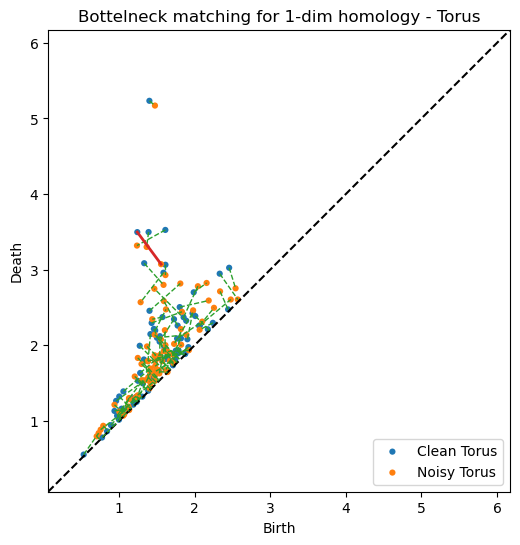

In [54]:
_, matching = persim.bottleneck( # Computes the Bottleneck distance
    diagrams_torus_clean[1],     # Retuns the matching of the points
    diagrams_torus_noise[1], 
    matching=True)

plt.figure(figsize=(6, 6))
persim.bottleneck_matching(
    diagrams_torus_clean[1], 
    diagrams_torus_noise[1], 
    matching=matching, 
    labels=['Clean Torus', 'Noisy Torus'])
plt.title('Bottelneck matching for 1-dim homology - Torus')
plt.show()

### Part 3 - Persistence landscapes

Persistence Homology and topological summaries

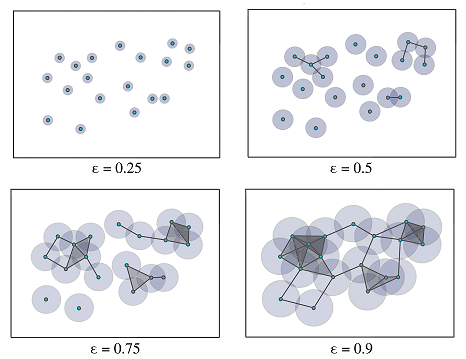

Persistence Homology and topological summaries

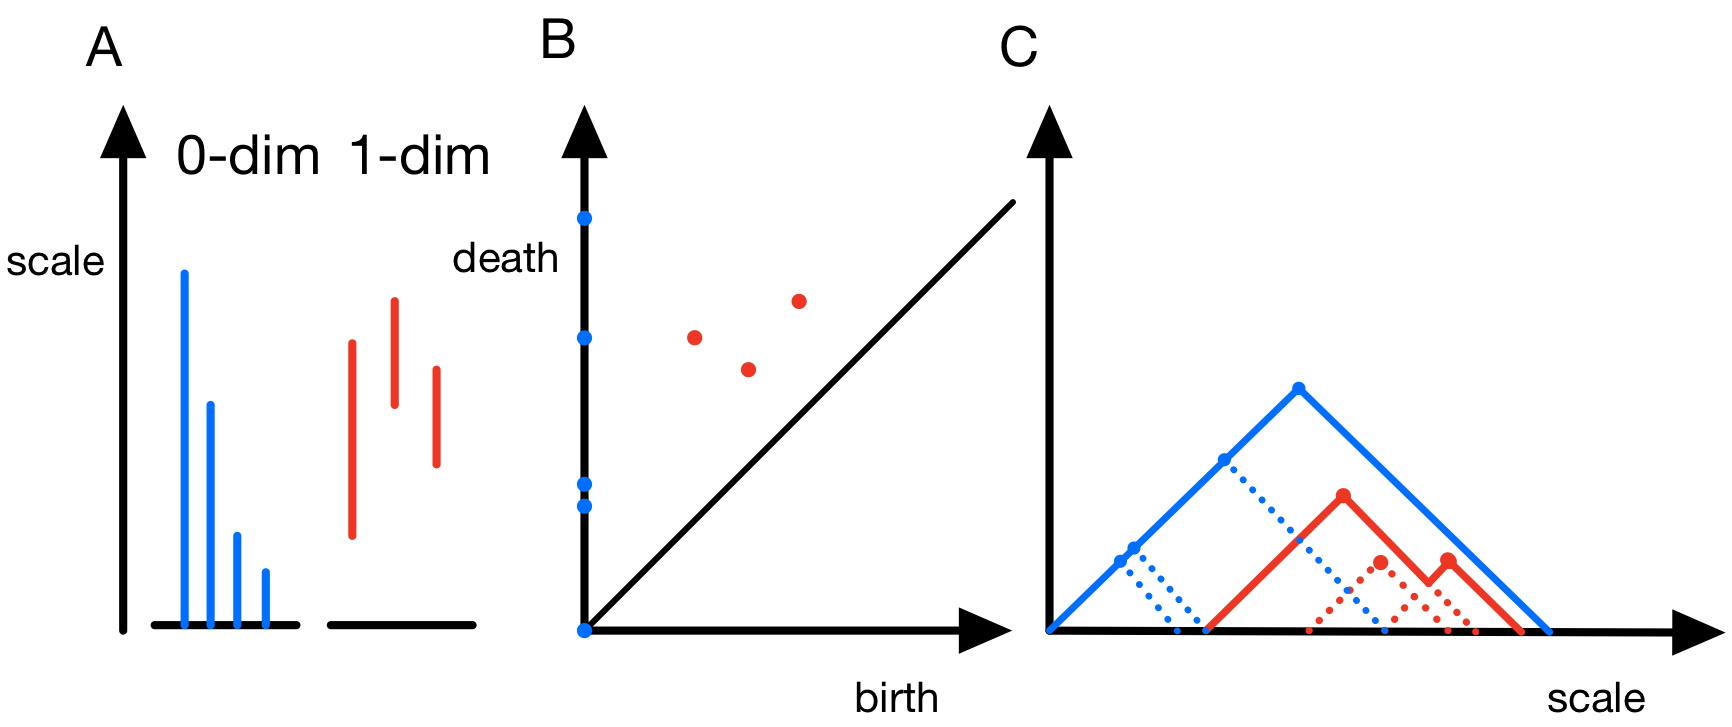

In [21]:
start = 0
stop = 6
num_steps = 200
x_scale = np.linspace(start, stop, num_steps)

# Will be used to build 1D landscapes
pl_1_builder = landscapes.PersistenceLandscaper(
    hom_deg=1,           # Dimension of the features in the PD
    start=start,         # Starting scale (landscape support)
    stop=stop,           # Stoping scale (landscape support)
    num_steps=num_steps, # Scale resolution resolution
    flatten=True)        # To return one landscape curve

# Will be used to build 2D landscapes
pl_2_builder = landscapes.PersistenceLandscaper(
    hom_deg=2,
    start=start,
    stop=stop, 
    num_steps=num_steps, 
    flatten=True)

In [22]:
# 1D Homology
pl_1_torus = pl_1_builder.fit_transform(diagrams_torus_clean) 
pl_1_spher = pl_1_builder.fit_transform(diagrams_sphere)

# To reshape the landscape curve into multiple layers
pl_1_torus = np.reshape(pl_1_torus, (num_steps, len(pl_1_torus)//num_steps), order='F')
pl_1_spher = np.reshape(pl_1_spher, (num_steps, len(pl_1_spher)//num_steps), order='F')

# 2D Homology
pl_2_torus = pl_2_builder.fit_transform(diagrams_torus_clean)
pl_2_spher = pl_2_builder.fit_transform(diagrams_sphere)

# To reshape the landscape curve into multiple layers
pl_2_torus = np.reshape(pl_2_torus, (num_steps, len(pl_2_torus)//num_steps), order='F')
pl_2_spher = np.reshape(pl_2_spher, (num_steps, len(pl_2_spher)//num_steps), order='F')

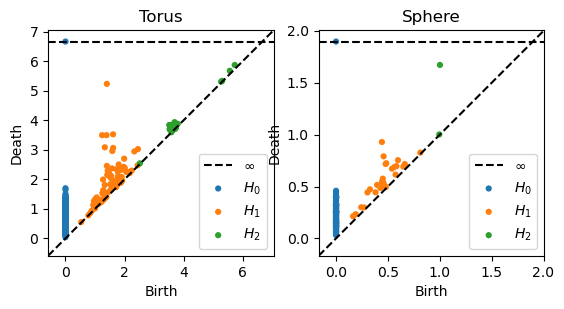

In [23]:
fg = plt.figure()
plt.subplot(121)
plt.title('Torus')
persim.plot_diagrams(diagrams_torus_clean)

plt.subplot(122)
plt.title('Sphere')
persim.plot_diagrams(diagrams_sphere)

plt.show()

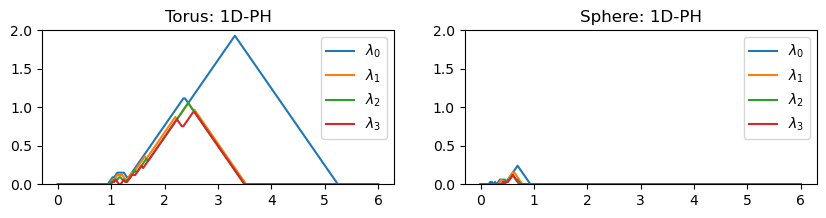

In [24]:
fg = plt.figure(figsize=(10, 2))
plt.subplot(121)
plt.title('Torus: 1D-PH')
plt.ylim([0, 2])
plt.plot(x_scale, pl_1_torus[:, :4]) # Plots the first K layers of the PL
plt.legend(('$\lambda_0$', '$\lambda_1$', '$\lambda_2$', '$\lambda_3$'))

plt.subplot(122)
plt.title('Sphere: 1D-PH')
x_lim = 50
plt.ylim([0, 2])
plt.plot(x_scale, pl_1_spher[:, :4]) # Plots the first K layers of the PL
plt.legend(('$\lambda_0$', '$\lambda_1$', '$\lambda_2$', '$\lambda_3$'))
plt.show()

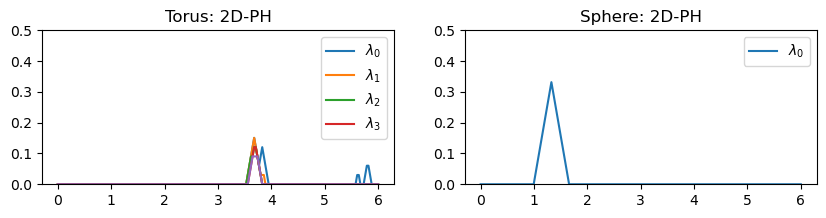

In [25]:
fg = plt.figure(figsize=(10, 2))
plt.subplot(121)
plt.title('Torus: 2D-PH')
plt.ylim([0, .5])
plt.plot(x_scale, pl_2_torus[:, :5]) # Plots the first K layers of the PL
plt.legend(('$\lambda_0$', '$\lambda_1$', '$\lambda_2$', '$\lambda_3$'))

plt.subplot(122)
plt.title('Sphere: 2D-PH')
plt.ylim([0, .5])
plt.plot(x_scale, pl_2_spher[:, :5]) # Plots the first K layers of the PL
plt.legend(('$\lambda_0$', '$\lambda_1$', '$\lambda_2$'))
plt.show()

### Part 4 - TDA for time series data

### Part 4.1 - Time delay embedding (TDE)

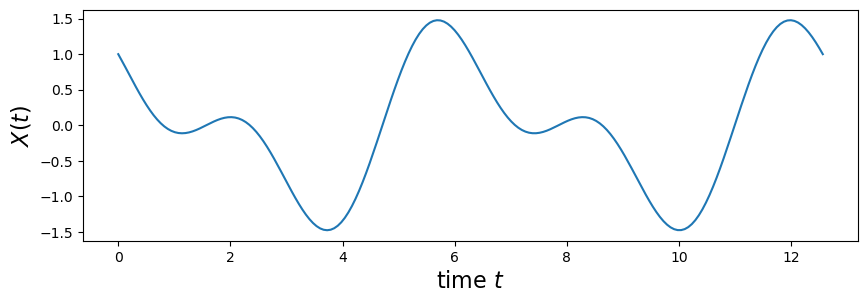

In [26]:
X = np.linspace(0, 4*np.pi, 200)
Y = np.cos(X) - .7*np.sin(2*X)

plt.figure(figsize=(10,3))
plt.plot(X, Y)
plt.xlabel('time $t$', fontsize=16)
plt.ylabel('$X(t)$', fontsize=16)
plt.show()

In [27]:
X1 = Y[100:]
X2 = Y[90:-10]
X3 = Y[80:-20]
X4 = Y[50:-50]
X5 = Y[10:-90]

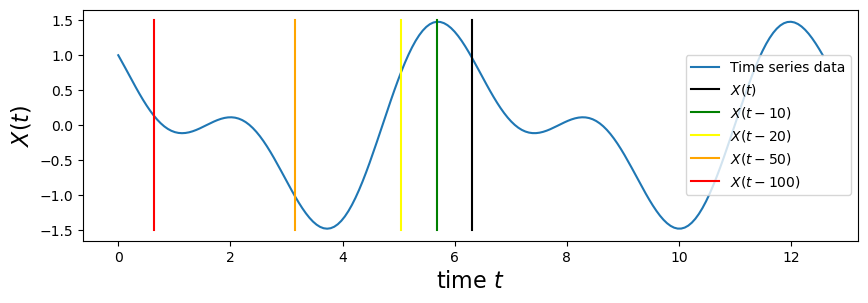

In [28]:
plt.figure(figsize=(10,3))
plt.plot(X, Y)
plt.plot(5 * [X[100]], np.linspace(-1.5, 1.5, 5), 'k')
plt.plot(5 * [X[90]], np.linspace(-1.5, 1.5, 5), 'green')
plt.plot(5 * [X[80]], np.linspace(-1.5, 1.5, 5), 'yellow')
plt.plot(5 * [X[50]], np.linspace(-1.5, 1.5, 5), 'orange')
plt.plot(5 * [X[10]], np.linspace(-1.5, 1.5, 5), 'red')
plt.xlabel('time $t$', fontsize=16)
plt.ylabel('$X(t)$', fontsize=16)
plt.legend(('Time series data', '$X(t)$', '$X(t-10)$', '$X(t-20)$', '$X(t-50)$', '$X(t-100)$'))
plt.show()

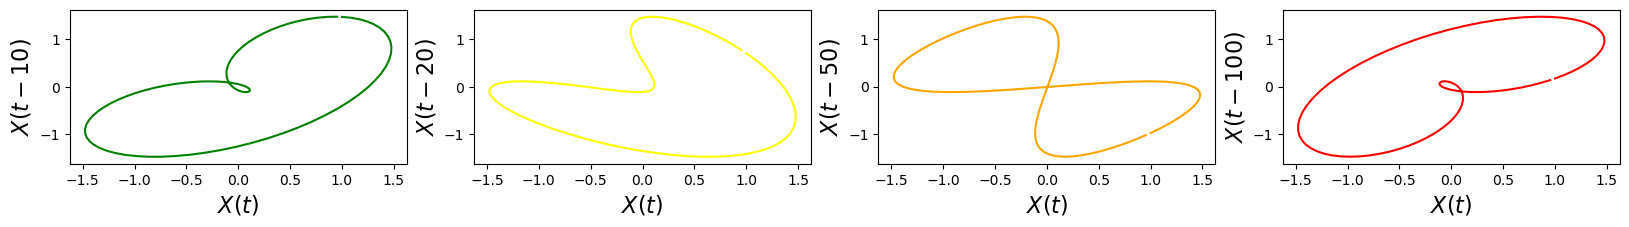

In [29]:
plt.figure(figsize=(20,2))
plt.subplot(141)
plt.plot(X1, X2, 'green')
plt.xlabel('$X(t)$', fontsize=16)
plt.ylabel('$X(t-10)$', fontsize=16)
plt.subplot(142)
plt.plot(X1, X3, 'yellow')
plt.xlabel('$X(t)$', fontsize=16)
plt.ylabel('$X(t-20)$', fontsize=16)
plt.subplot(143)
plt.plot(X1, X4, 'orange')
plt.xlabel('$X(t)$', fontsize=16)
plt.ylabel('$X(t-50)$', fontsize=16)
plt.subplot(144)
plt.plot(X1, X5, 'red')
plt.xlabel('$X(t)$', fontsize=16)
plt.ylabel('$X(t-100)$', fontsize=16)
plt.show()

Taken's theorem in a nutshell:
- The pahse space trajectory can be reconstructed from a time series by the time delay embedding.
<center>$X(t) = [x(t), x(t-\tau), \dots, x(t-(m-1) \tau)]$</center>

Example, Lorenz system:
<center>
    $
    \begin{align*} 
        \dot{x} &= \sigma(y-x), \\
        \dot{y} &= x(\rho-z)-y, \\
        \dot{z} &= xy - \beta z.
    \end{align*}
    $
</center>

In [30]:
def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

In [31]:
dt = 0.01
num_steps = 100000
xyzs = np.empty((num_steps + 1, 3))
xyzs[0] = (0., 1., 1.05)  # Set initial values
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

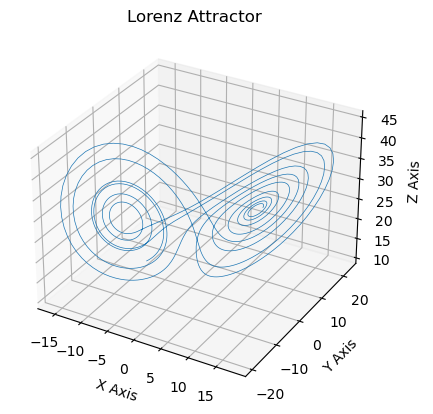

In [32]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*xyzs[-1000:].T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

In [37]:
X_TDE = xyzs[1000:].copy()

X_TDE[500: -500, 1] = X_TDE[500: -500, 0]
X_TDE[1000:, 2]     = X_TDE[1000:, 0]

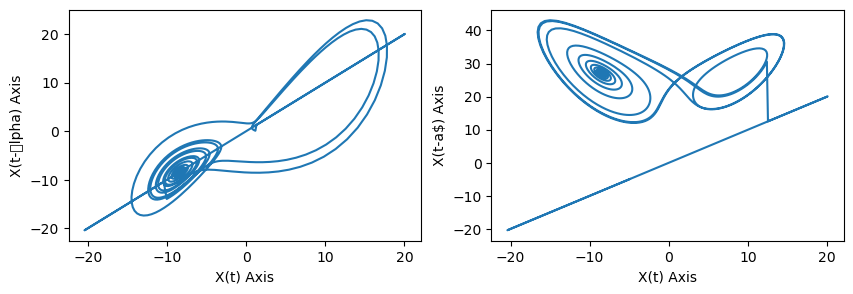

In [38]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(X_TDE[:, 0], X_TDE[:, 1])
plt.xlabel("X(t) Axis")
plt.ylabel("X(t-\alpha) Axis")
plt.subplot(122)
plt.plot(X_TDE[:, 0], X_TDE[:, 2])
plt.xlabel("X(t) Axis")
plt.ylabel("X(t-a$) Axis")

plt.show()

### Part 4.2 - Sliding window embedding (SWE)

<center>
$
\begin{align*}
    x(t) & = [x_1(t), ..., x_p(t)]' &&\in \mathbb{R}^p, \hspace{2mm} t = 1, ..., T \\
    X(t) & = [x(t), x(t-1), ..., x(t-(m-1))] &&\in \mathbb{R}^{p\times m}, \hspace{2mm} t = m, ..., T
\end{align*}
$
</center>

### Part 5 - Application to EEG Epileptic seizure data set

In [39]:
TS = np.array([np.loadtxt('./WORKING-DIR/Michigan-EEG/ch{:02d}.inp'.format(i)) for i in range(1, 22)]).T
TS -= TS.mean(axis=0)
TS /= TS.std(axis=0)

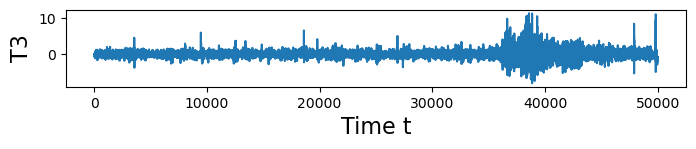

In [45]:
plt.figure(figsize=(8, 1))
plt.plot(TS[:, 14])
plt.ylabel('T3', fontsize=16)
plt.xlabel('Time t', fontsize=16)
plt.show()

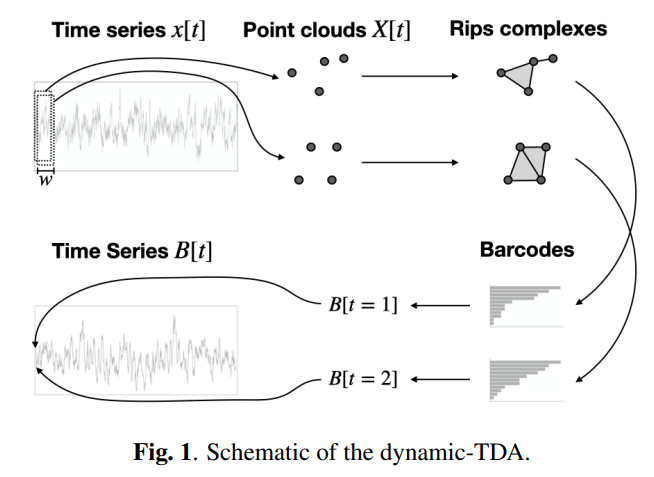

Songdechakraiwut and Chung (2020)

In [49]:
def getTotalPersistence(dgm, dim=0):

    total_persistence = 0
    for b, d in dgm[dim]:
        if d != float("inf"): 
            total_persistence += d - b
    
    return total_persistence

In [50]:
T, P = TS.shape
n = 100

TP_0 = []
TP_1 = []
TP_2 = []

for i_s, i_e in zip(range(0, T-n, 500), range(n, T, 500)):
    SW_data = TS[i_s:i_e]
    SW_tda = ripser(X=SW_data, maxdim=2)
    SW_diagrams = SW_tda['dgms']
    
    total_persistence_0 = getTotalPersistence(SW_diagrams, dim=0)
    total_persistence_1 = getTotalPersistence(SW_diagrams, dim=1)
    total_persistence_2 = getTotalPersistence(SW_diagrams, dim=2)
    
    TP_0.append(total_persistence_0)
    TP_1.append(total_persistence_1)
    TP_2.append(total_persistence_2)    

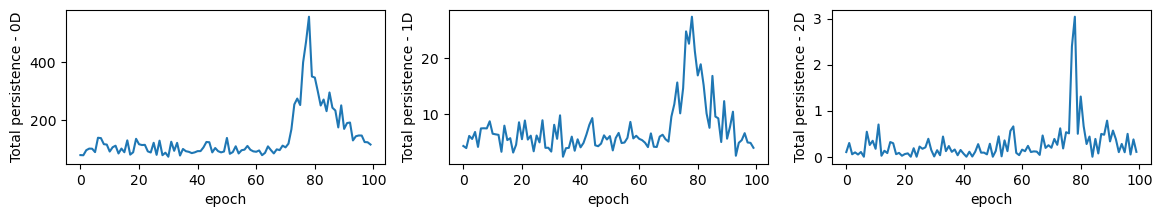

In [51]:
plt.figure(figsize=(14, 2))
plt.subplot(131)
plt.plot(TP_0)
plt.xlabel('epoch')
plt.ylabel('Total persistence - 0D')
plt.subplot(132)
plt.plot(TP_1)
plt.xlabel('epoch')
plt.ylabel('Total persistence - 1D')
plt.subplot(133)
plt.plot(TP_2)
plt.xlabel('epoch')
plt.ylabel('Total persistence - 2D')
plt.show()

### Part 5.2 - Inference for Dynamic TDA 

- Define the CUSUM statistic to analyze the mean structure of the signal
- Compute the running p-values for every epoch or sliding window

### Summary:

- PH with Rips filtrations using Python
- Computing distances between diagrams
- Computing landscapes
- TDE SWE motivated by Taken's theorem
- Application to Epileptic seizure data

### Keep in mind that there are other TDA approaches for time series data:
- Morse filtration for smooth functions
- Dependence based TDA

### References (TDA - Theory)
- Edelsbrunner et.al. 2002
    - [Topological Persistence and Simplification](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=892133)
- Ghrist 2008
    - [Barcodes: The Persistent Topology of Data](https://www.ams.org/journals/bull/2008-45-01/S0273-0979-07-01191-3/S0273-0979-07-01191-3.pdf)
- Bubenik 2015
    - [Statistical TDA using Persistence Landscapes](https://jmlr.org/papers/v16/bubenik15a.html)
- Songdechakraiwut et.al. 2020
    - [Dynamic TDA for Functional Brain Signals](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9153431&casa_token=IJjoRTm95XQAAAAA:vaEWmgImJCMsimT4vEdh3svBm8QDVSJhOPdlB3Ssiv7Bjvw_UjYS8jO7U7NAvSoGkqK2x_5krXR2&tag=1)
- El-Yaagoubi et.al. 2022
    - [TDA for Multivariate Time Series Data](https://arxiv.org/pdf/2204.13799.pdf)

### References (TDA - Packages)
- Saul et.al. 2019
    - [Scikit-TDA: Topological Data Analysis for Python](http://doi.org/10.5281/zenodo.2533369)
- Tarlie et.al. 2018
    - [A Lean Persistent Homology Library for Python](https://doi.org/10.21105/joss.00925)
- Bauer Ulrich 2021
    - [Ripser: efficient computation of Vietoris-Rips persistence barcodes](https://doi.org/10.1007/s41468-021-00071-5)
